In [1]:
# Tomato Leaf Disease Detection

# In this program I will build 3 differnt CNN models to find maximum accuracy.
# I will then build two transfer learning model approaches namely Incpetion-V3 and VGG-16

# Then, I will do the testing with the model from which we obtain highest accuracy.

# Code I: I have used one FC layer with batch size = default
# CodeII: I have used two FC layer with batch size = default
# Code III: I have used one FC layer with batch size = 64

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Importing the images 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/BTP/Dataset/tomato.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/BTP/Dataset/dataset')

In [24]:
TRAINING_DIR = '/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/train/' 
TESTING_DIR = '/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/valid/'

In [35]:
#It provides a host of different augmentation techniques like standardization, rotation, 
#shifts, flips, brightness change, and many more
train_datagen = ImageDataGenerator(
        validation_split=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset="training")

Found 14678 images belonging to 10 classes.


In [36]:
validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset="validation")

Found 3667 images belonging to 10 classes.


In [37]:
test_generator = test_datagen.flow_from_directory(
        TESTING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 4585 images belonging to 10 classes.


In [19]:
# train_X=train_generator
# train_Y=train_generator.classes
# test_X=test_generator
# test_Y = test_generator.classes
# print("Train_X or X_train",train_X)
# print("Train_Y or Y_train",train_Y)
# print("Test_X or X_test",test_X)
# print("Test_Y or Y_test",test_Y)


# Creating the first CNN model

## 1. Using K-Fold Cross Valdation



In [20]:
# from sklearn.model_selection import train_test_split
# # fix random seed for reproducibility
# seed = 7
# # split into 67% for train and 33% for test
# X_train, X_test, y_train, y_test = train_test_split(train_generator, test_generator, test_size=0.33)


In [28]:
# X_train=train_X
# Y_train=train_Y

X_train, Y_train = next(train_generator)
X_test, Y_test = next(validation_generator)

In [ ]:
# print("X_Train",X_train)
# print("Y_Train",Y_train)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    MaxPooling2D,
    Conv2D,
    Flatten,
    BatchNormalization,
)


cvscores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=5)

for train, val in kfold.split(X_train, Y_train):
    model = tf.keras.models.Sequential()

    #Convolution layer 1
    model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
    # cnn.add(BatchNormalization())

    # Pooling 1
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # cnn.add(BatchNormalization())

    #Convolution layer 2
    model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
    # cnn.add(Dropout(0.25))

    # cnn.add(BatchNormalization())

    # Pooling 2
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # cnn.add(BatchNormalization())

    # Flattening
    model.add(tf.keras.layers.Flatten())
    # cnn.add(BatchNormalization())

    #Full Connection
    model.add(tf.keras.layers.Dense(units=128,activation='relu'))
    # cnn.add(BatchNormalization())

    #Output Layer
    model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

    #Compiling
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    # # Summary of the model
    # model.summary()

    # temp = model.fit(X_train[train], Y_train[train],epochs=50)

    temp = model.fit(
        X_train[train], Y_train[train], batch_size=32, epochs=30, verbose=1
    )

    scores = model.evaluate(X_train[val], Y_train[val])
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
    cvscores.append(scores[1] * 100)



In [ ]:
print(cvscores)

In [ ]:
plt.plot(cvscores)
plt.xlabel("k-fold")
plt.ylabel("val accuracy")

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=model.evaluate(train_generator)
scores2=model.evaluate(test_generator)
print("Training Loss is : "+str(scores[0]))
print("Training Accuracy is : "+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

In [ ]:
print("Mean of the accuracies: ", np.mean(cvscores))
print("Standard devaiation of the accuracies: ", np.std(cvscores))


In [ ]:
plt.plot(temp.history["accuracy"])
plt.plot(temp.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["accuracy", "loss"])



# Creating the first CNN model
## 2. Using Hold-out method


In [ ]:
# First model

from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn = tf.keras.models.Sequential()

#Convolution layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(BatchNormalization())

# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())

#Convolution layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(Dropout(0.25))

# cnn.add(BatchNormalization())

# Pooling 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())

# Flattening
cnn.add(tf.keras.layers.Flatten())
# cnn.add(BatchNormalization())

#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn.add(BatchNormalization())

#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn.summary()

# Fit

# temp = cnn.fit(x = train_generator, validation_data=test_generator,epochs=5)
temp = cnn.fit(x = train_generator, validation_data=validation_generator,epochs=50)


In [ ]:
# plot the model accuracy and validation accuracy

plt.plot(temp.history['accuracy'])
plt.plot(temp.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=cnn.evaluate(train_generator)
scores2=cnn.evaluate(test_generator)
print("Training Loss is : "+str(scores[0]))
print("Training Accuracy is : "+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

## Classification Report

In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

## Confusion Matrix

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

In [ ]:
# Testing the model
# from keras.preprocessing import image

import keras.utils as image

test = image.load_img("/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/valid/Tomato___Spider_mites Two-spotted_spider_mite/00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453_flipTB.JPG",target_size = (150, 150))
test=image.img_to_array(test)
# /content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/valid/Tomato___Spider_mites Two-spotted_spider_mite/00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453_flipTB.JPG
test=np.expand_dims(test,axis=0)
result=cnn.predict(test)
print(result)

In [ ]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
result

## CNN Model-2

In [12]:
# Second model

from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn2 = tf.keras.models.Sequential()

#Convolution layer 1
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn2.add(BatchNormalization())

# Pooling 1
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn2.add(BatchNormalization())

#Convolution layer 2
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn2.add(BatchNormalization())

# Pooling 2
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn2.add(Dropout(0.25))
# cnn2.add(BatchNormalization())

# Flattening
cnn2.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn2.add(BatchNormalization())

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn2.add(BatchNormalization())

#Output Layer
cnn2.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn2.summary()

# Fit
#temp = cnn2.fit(x = train_generator, validation_data=test_generator,epochs=25)
temp = cnn2.fit(x = train_generator, validation_data=validation_generator,epochs=50)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

KeyboardInterrupt: ignored

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=cnn2.evaluate(train_generator)
scores2=cnn2.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn2.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [ ]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

In [ ]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## CNN Model-3 

In [38]:
# Third model

from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn3 = tf.keras.models.Sequential()

#Convolution layer 1
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn3.add(BatchNormalization())

# Pooling 1
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn3.add(BatchNormalization())

#Convolution layer 2
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn3.add(BatchNormalization())

# Pooling 2
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn3.add(BatchNormalization())

# Flattening
cnn3.add(tf.keras.layers.Flatten())
# cnn3.add(BatchNormalization())

#Full Conncetion
cnn3.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn3.add(Dropout(0.25))

#Output Layer
cnn3.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn3.summary()

# Fit
#temp = cnn3.fit(x = train_generator, validation_data=test_generator,epochs=25,batch_size = 64)
temp = cnn3.fit(x = train_generator, validation_data=validation_generator,epochs=50,batch_size = 64)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [39]:
# Scores is just a list containing loss and accuracy value
scores=cnn3.evaluate(train_generator)
scores2=cnn3.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

144/144 [==============================] - 14s 97ms/step - loss: 0.0860 - accuracy: 0.9178
Training Loss is :0.005929809994995594
Training Accuracy is :99.3595838546753 %
Testing Loss is : 0.08598877489566803
Testing Accuracy is : 91.77753329277039 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn3.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [41]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.07      0.07      0.07       425
                        Tomato___Early_blight       0.12      0.14      0.13       480
                         Tomato___Late_blight       0.06      0.06      0.06       463
                           Tomato___Leaf_Mold       0.11      0.09      0.10       470
                  Tomato___Septoria_leaf_spot       0.07      0.08      0.07       436
Tomato___Spider_mites Two-spotted_spider_mite       0.12      0.10      0.11       435
                         Tomato___Target_Spot       0.10      0.10      0.10       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.11      0.11      0.11       490
                 Tomato___Tomato_mosaic_virus       0.09      0.10      0.10       448
                             Tomato___healthy       0.14      0.15      0.14       481

                                     accu

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

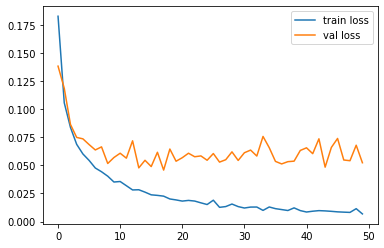

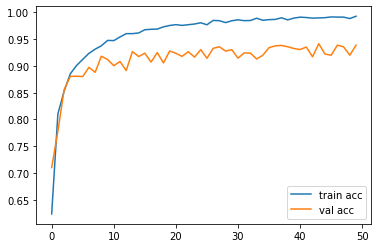

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Inception-V3

## Detection of Tomato Leaf Disease by Transfer learning InceptionV3

#### Importing libraries and essentials for the model

In [44]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

##### Data Augmentation

Increasing the data by horizontal flip, shear range and rotation range to get the image classification better accuracy.
Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data.

In [45]:
train_datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255,
                                 horizontal_flip=True,rotation_range=.2,shear_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

##### About Dataset

   1. The dataset consists of training data, and validation data.
   2. The training data consists of 18345  images with 10 classes and 3,875 test images with 10.
   3. The classes are Tomato___Bacterial_spot, Tomato___Early_blight, Tomato___healthy, Tomato___Late_blight, Tomato___Leaf_Mold, Tomato___Septoria_leaf_spot, Tomato___Spider_mites Two-spotted_spider_mite, Tomato___Target_Spot, Tomato___Tomato_mosaic_virus, Tomato___Tomato_Yellow_Leaf_Curl_Virus.

In [46]:
TRAINING_DIR = '/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/train/' 
TESTING_DIR = '/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/valid/'

In [47]:
training_set=train_datagen.flow_from_directory(TRAINING_DIR,
                                               target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True,subset="training")

validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset="validation")

test_set=test_datagen.flow_from_directory(TESTING_DIR,
                                          target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True)

Found 14678 images belonging to 10 classes.
Found 3667 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


### InceptionV3

Inception v3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for Googlenet. It is the third edition of Google's Inception Convolutional Neural Network, originally introduced during the ImageNet Recognition Challenge. Just as ImageNet can be thought of as a database of classified visual objects, Inception helps classification of objects in the world of computer vision.


In [48]:
inception=InceptionV3(input_shape=[224,224,3],weights="imagenet",include_top=False)

87910968/87910968 [==============================] - 4s 0us/step


**We will not train the layers because the layers of InceptionV3 layers are already trained with imagenet dataset.** 

In [49]:
for layer in inception.layers:
  layer.trainable=False

In [50]:
folder=glob("/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/train/*")

**Adding a flatten layer along with a Dense layer whose neuron will be equal to the number of classes with and activation funtion softmax**

**Then we will concat the model and name inception_model**

In [51]:
x=Flatten()(inception.output)
predict_inception=Dense(units=len(folder),activation="softmax")(x)
inception_model=Model(inputs=inception.input,outputs=predict_inception)

**We have taken the optimizer Adam and the loss will be categorical crossentropy and our aim will be to find the accuracy**

In [52]:
inception_model.compile(optimizer="adam",
                        loss="categorical_crossentropy",metrics=["accuracy"])

#### Final Architecture

In [53]:
inception_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 111, 111, 32  96         ['conv2d_6[0][0]']               
 rmalization)                   )                                                             

In [ ]:
transfer_inception=inception_model.fit_generator(training_set,validation_data=validation_generator,
                                                 validation_steps=len(validation_generator),steps_per_epoch=len(training_set),epochs=50)

<ipython-input-54-361267ce6862>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  transfer_inception=inception_model.fit_generator(training_set,validation_data=validation_generator,


Epoch 1/50
459/459 [==============================] - 298s 559ms/step - loss: 2.7762 - accuracy: 0.6888 - val_loss: 2.4999 - val_accuracy: 0.7210
Epoch 2/50
459/459 [==============================] - 247s 538ms/step - loss: 1.5254 - accuracy: 0.8260 - val_loss: 2.3065 - val_accuracy: 0.7707
Epoch 3/50
459/459 [==============================] - 245s 534ms/step - loss: 1.3138 - accuracy: 0.8602 - val_loss: 2.1676 - val_accuracy: 0.8056
Epoch 4/50
459/459 [==============================] - 242s 528ms/step - loss: 1.0814 - accuracy: 0.8898 - val_loss: 3.4802 - val_accuracy: 0.7581
Epoch 5/50
429/459 [===========================>..] - ETA: 13s - loss: 1.2631 - accuracy: 0.8870

After training the model I have noticed that the model is **Overfiiting.**

**Overfitting means for training dataset the model perform good but for test dataset the model will not perform well.**  

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=inception_model.evaluate(training_set)
scores2=inception_model.evaluate(test_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

In [ ]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = inception_model.predict(test_set, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [ ]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

In [ ]:
# plot the loss
plt.plot(transfer_inception.history['loss'], label='train loss')
plt.plot(transfer_inception.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_inception.history['accuracy'], label='train acc')
plt.plot(transfer_inception.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### Prediction

In [ ]:
y_pred_incep=inception_model.predict(test_set)

**The predicted output is a probability due to the activation funtion Softmax, it returns probability of the classes
We will now change the probability to discrete values**

In [ ]:
import numpy as np
y_pred_incep=np.argmax(y_pred_incep,axis=1)

**Saving the model**

In [ ]:
inception_model.save("Tomato_inceptionv3.h5")
from tensorflow.keras.models import load_model
modelinception=load_model("Tomato_inceptionv3.h5")

**Testing the Model with validation dataset** 

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for fn in uploaded.keys():
#   # predict images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(224,224))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis =0)

#   preds = modelinception.predict(x)
#   preds=np.argmax(preds, axis=1)
#   if preds==0:
#         preds="Tomato___Bacterial_spot"
#   elif preds==1:
#         preds="Tomato___Early_blight"
#   elif preds==2:
#         preds="Tomato___healthy"
#   elif preds==3:
#         preds="Tomato___Late_blight"
#   elif preds==4:
#         preds="Tomato___Leaf_Mold"
#   elif preds==5:
#         preds="Tomato___Septoria_leaf_spot"
#   elif preds==6:
#         preds="Tomato___Spider_mites Two-spotted_spider_mite"
#   elif preds==7:
#         preds="Tomato___Target_Spot"
#   elif preds==8:
#         preds="Tomato___Tomato_mosaic_virus"
#   else:
#         preds="Tomato___Tomato_Yellow_Leaf_Curl_Virus"
#   print(preds)
#   plt.imshow(img)

### VGG16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.



In [ ]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/train/' 
TESTING_DIR = '/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/valid/'

In [ ]:
train_datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255,
                                 horizontal_flip=True,shear_range=.2,rotation_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(TRAINING_DIR,
                                               target_size=(224,224),class_mode="categorical",batch_size=50,shuffle=True,subset="training")

validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset="validation")

test_set=test_datagen.flow_from_directory(TESTING_DIR,
                                          target_size=(224,224),batch_size=50,class_mode="categorical",shuffle=True)

In [ ]:
vgg16=VGG16(include_top=False,weights="imagenet",input_shape=[224,224,3])

**We will not train the layers because the layers of VGG16 layers are already trained with imagenet dataset.** 

In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
folder=glob("/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/train/*")
folder

**Adding a flatten layer along with a Dense layer whose neuron will be equal to the number of classes with and activation funtion softmax**

**Then we will concat the model and name vgg16_model**

In [ ]:
x=Flatten()(vgg16.output)
pred_vgg16=Dense(units=len(folder),activation="softmax")(x)
vgg16_model=Model(inputs=vgg16.input,outputs=pred_vgg16)

**We have taken the optimizer Adam and the loss will be categorical crossentropy and our aim will be to find the accuracy**

In [ ]:
vgg16_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### Final Architecture

In [ ]:
vgg16_model.summary()

**Train the model with an epoch of 20 and the validation data will be the test data**

In [ ]:
transfer_vgg16=vgg16_model.fit_generator(training_set,validation_data=validation_generator,epochs=50,
                                         validation_steps=len(validation_generator),steps_per_epoch=len(training_set))

After the training I have noticed that the model is not **overfit and the loss and accuracy is somewhat equal to validation loss and validation accuracy.**

Which means the model will perform good

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=vgg16_model.evaluate(training_set)
scores2=vgg16_model.evaluate(test_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

In [ ]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = vgg16_model.predict(test_set, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [ ]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

In [ ]:
# plot the loss
plt.plot(transfer_vgg16.history['loss'], label='train loss')
plt.plot(transfer_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg16.history['accuracy'], label='train acc')
plt.plot(transfer_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### Prediction

In [ ]:
y_pred_vgg16=vgg16_model.predict(test_set)

**The predicted output is a probability due to the activation funtion Softmax, it returns probability of the classes
We will now change the probability to discrete values**

In [ ]:
import numpy as np
y_pred_vgg16=np.argmax(y_pred_vgg16,axis=1)

**Saving the model**

In [ ]:
vgg16_model.save("Tomato_vgg16.h5")
from tensorflow.keras.models import load_model
modelvgg16=load_model("Tomato_vgg16.h5")

**Testing the Model with validation dataset** 

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for fn in uploaded.keys():
#   # predict images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(224,224))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis =0)

#   preds = modelvgg16.predict(x)
#   preds=np.argmax(preds, axis=1)
#   if preds==0:
#         preds="Tomato___Bacterial_spot"
#   elif preds==1:
#         preds="Tomato___Early_blight"
#   elif preds==2:
#         preds="Tomato___healthy"
#   elif preds==3:
#         preds="Tomato___Late_blight"
#   elif preds==4:
#         preds="Tomato___Leaf_Mold"
#   elif preds==5:
#         preds="Tomato___Septoria_leaf_spot"
#   elif preds==6:
#         preds="Tomato___Spider_mites Two-spotted_spider_mite"
#   elif preds==7:
#         preds="Tomato___Target_Spot"
#   elif preds==8:
#         preds="Tomato___Tomato_mosaic_virus"
#   else:
#         preds="Tomato___Tomato_Yellow_Leaf_Curl_Virus"
#   print(preds)
#   plt.imshow(img)

# Misc

In [ ]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=r.evaluate(train_generator)
scores2=r.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is :"+str(scores2[0]))
print("Testing Accuracy is :"+str(scores2[1]*100)+" %")

In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = r.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [ ]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

In [ ]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')